In [ ]:
import pandas as pd

df = pd.read_csv(
    "/content/book_sales.csv",
    index_col='Date',
    parse_dates=['Date']
    ).drop('Paperback', axis=1)

df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


**Linear Regression with Time Series**

*Time-step features*

In [ ]:
import numpy as np

df['Time'] = np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


Text(0.5, 1.0, 'Time plot of Hardcover sales')

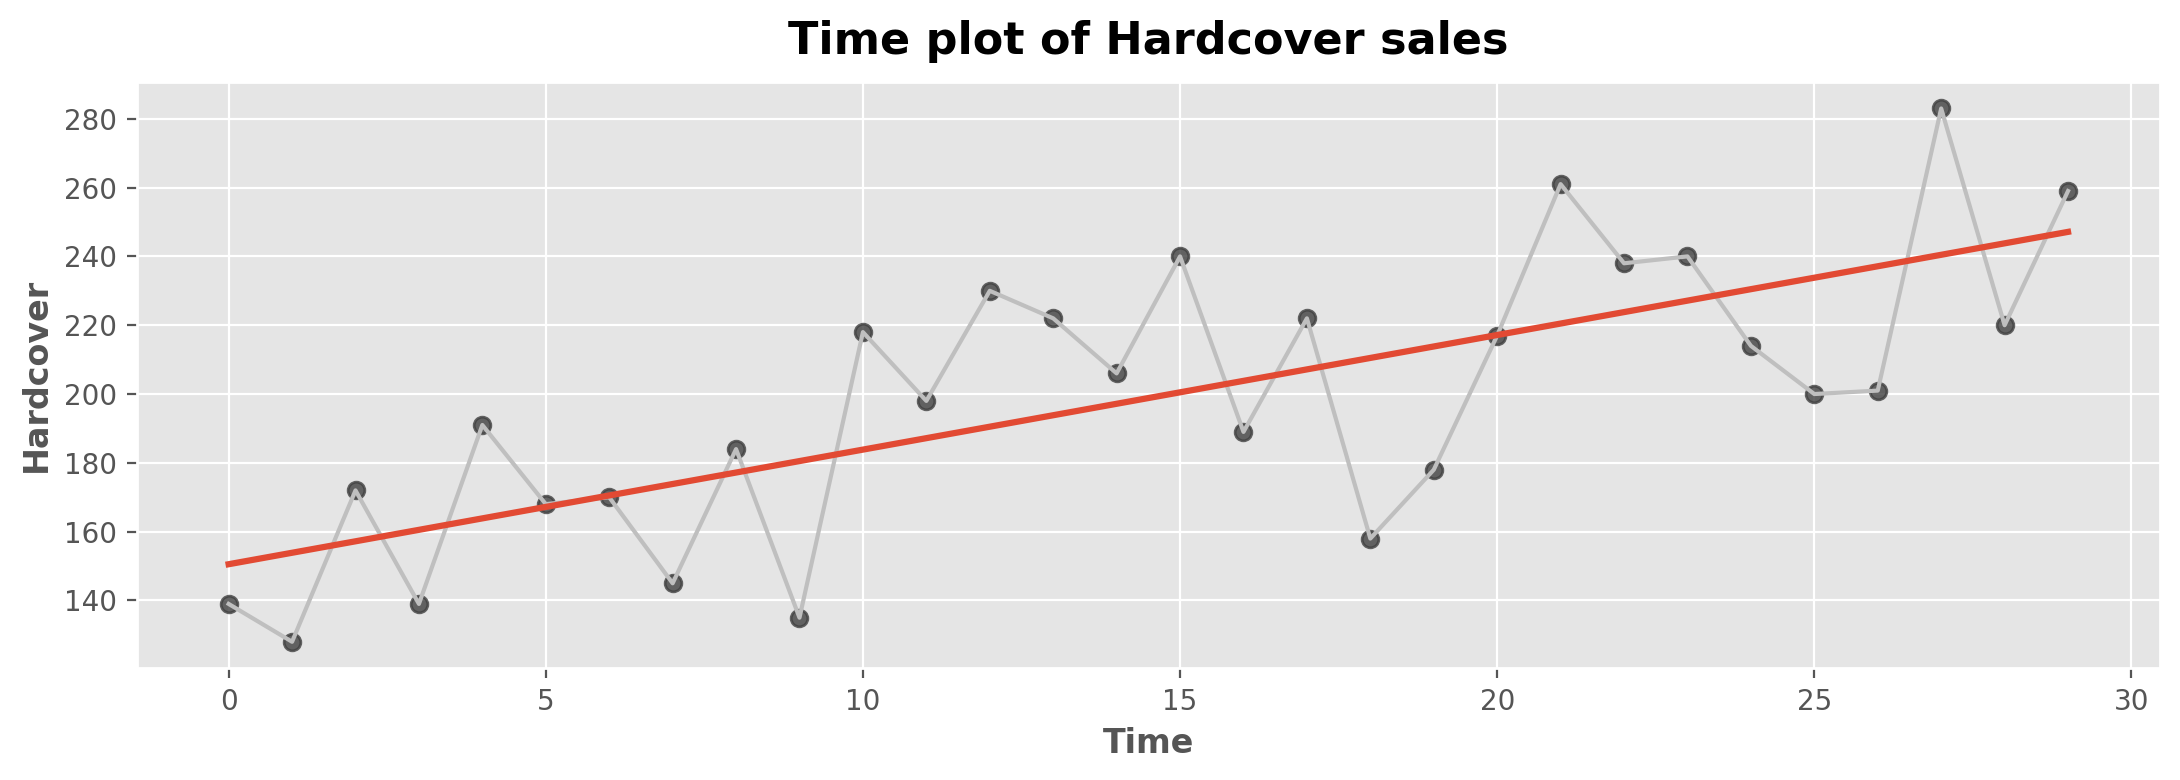

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight="bold"
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of Hardcover sales')

*Lag features*

In [ ]:
df['Lag_1'] = df['Hardcover'].shift(1)  # This shifts the values down by 1 row
df = df.reindex(columns=['Hardcover', 'Lag_1'])   # Reorder or select specific columns in the DataFrame

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Text(0.5, 1.0, 'Lag plot of Hardcover Sales')

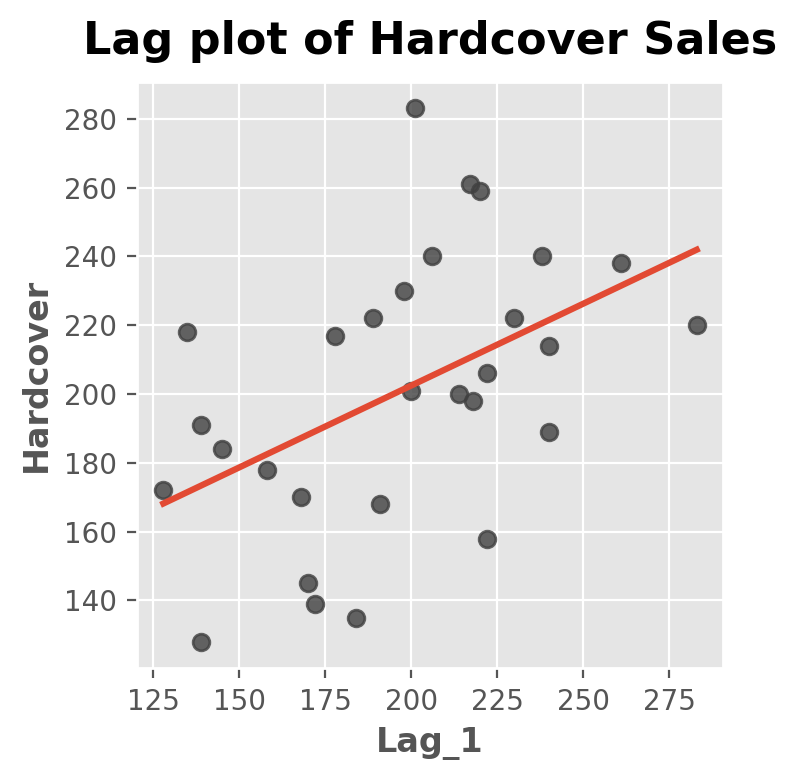

In [ ]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag plot of Hardcover Sales')

**Example: Tunnnel Traffick**

In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")    # ignore warnings to clean up output cells

# Set matplotlib defaults
plt.style.use("ggplot")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

# Load Tunnel Traffic dataset
tunnel = pd.read_csv("/content/tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day")
tunnel.to_period()   # convert datetime index into a period index.

tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


*Time-step feature*

In [ ]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features,Selects the 'Time' column as the input feature (X).
y = df.loc[:, 'NumVehicles']  # Targets, Selects the 'NumVehicles' column as the target/output (y)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)  #  Predicts values using the trained model and stores them in a Series with the same index as X.

Text(0.5, 1.0, 'Time Plot of Tunnel Traffick')

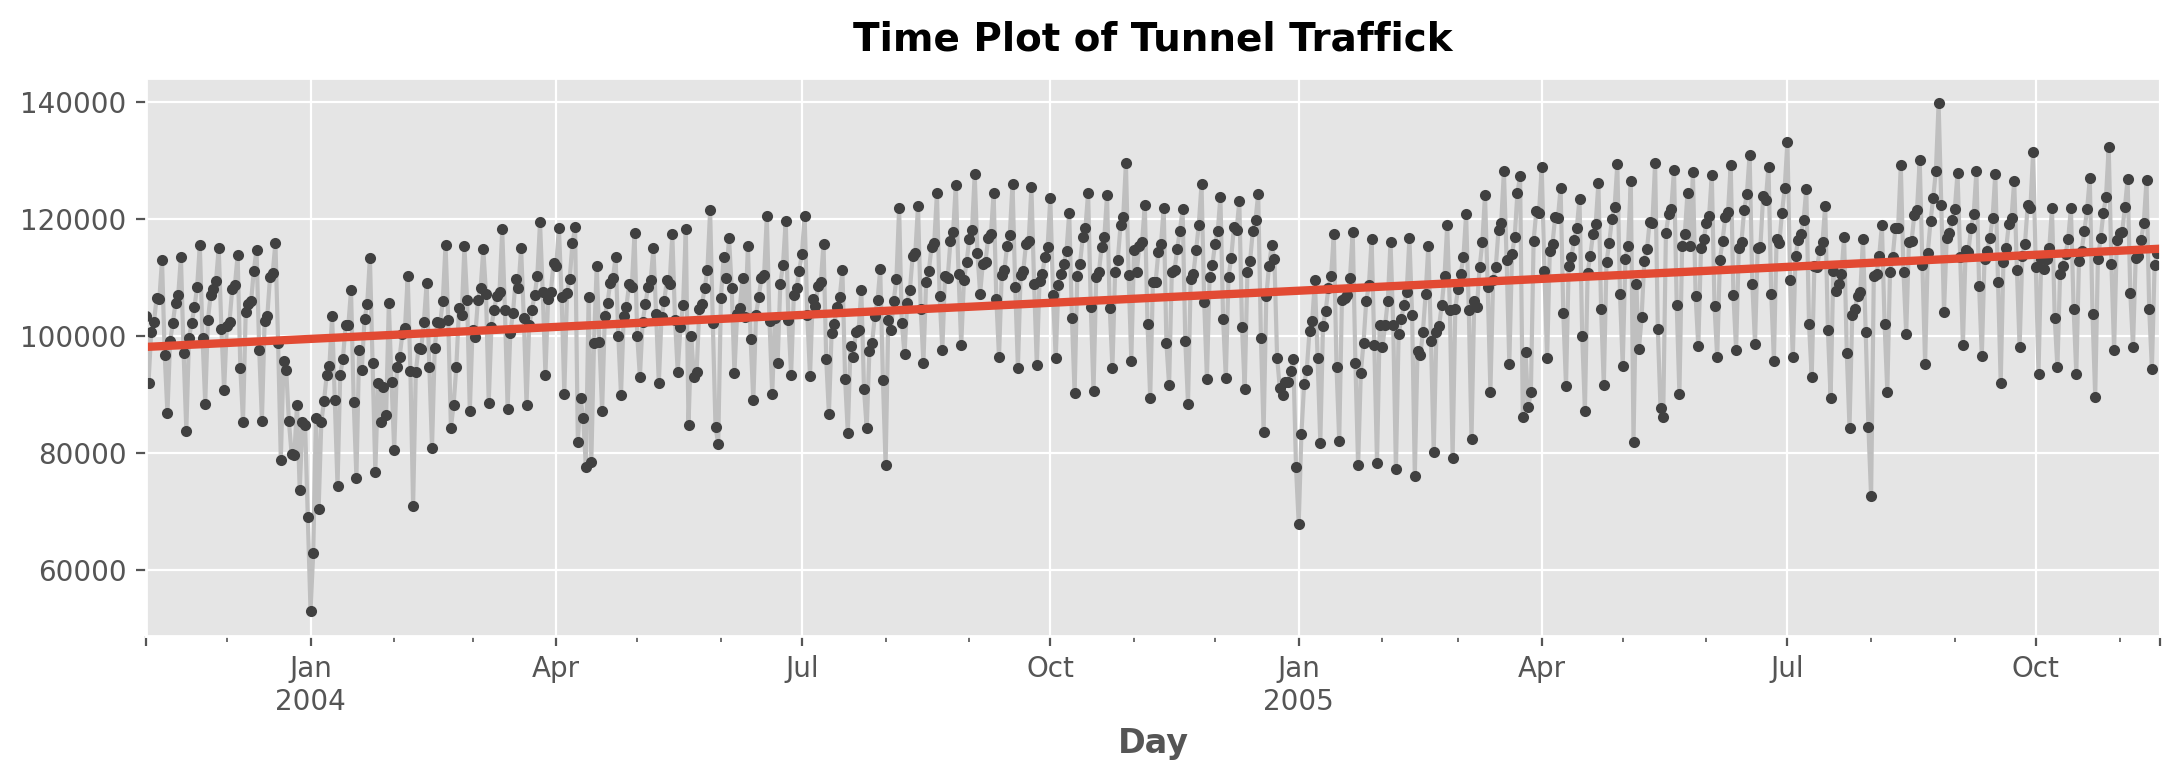

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title("Time Plot of Tunnel Traffick")

*Lag feature*

In [ ]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [ ]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner')   # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

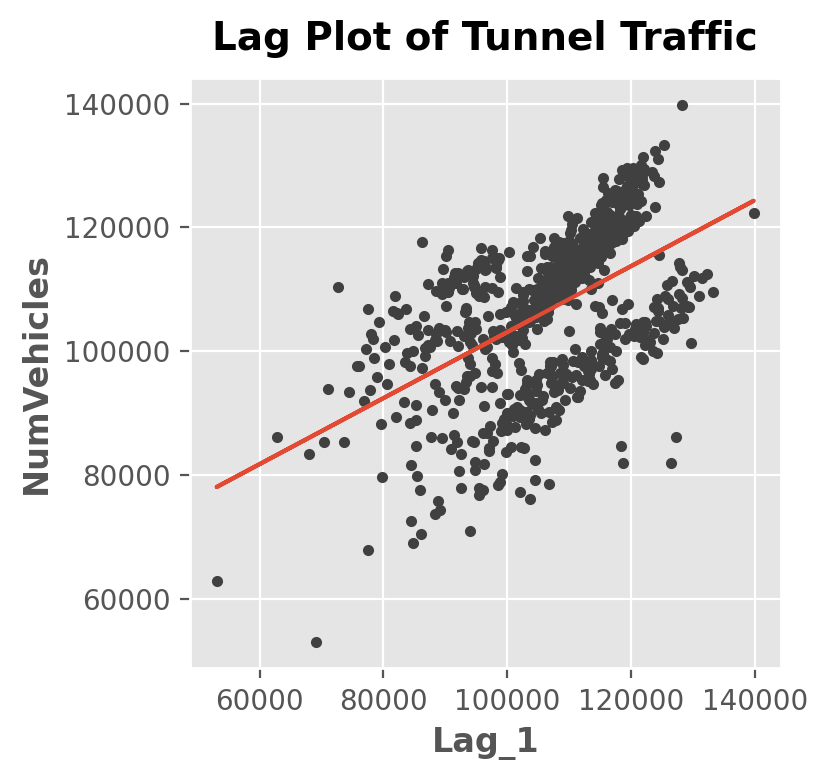

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

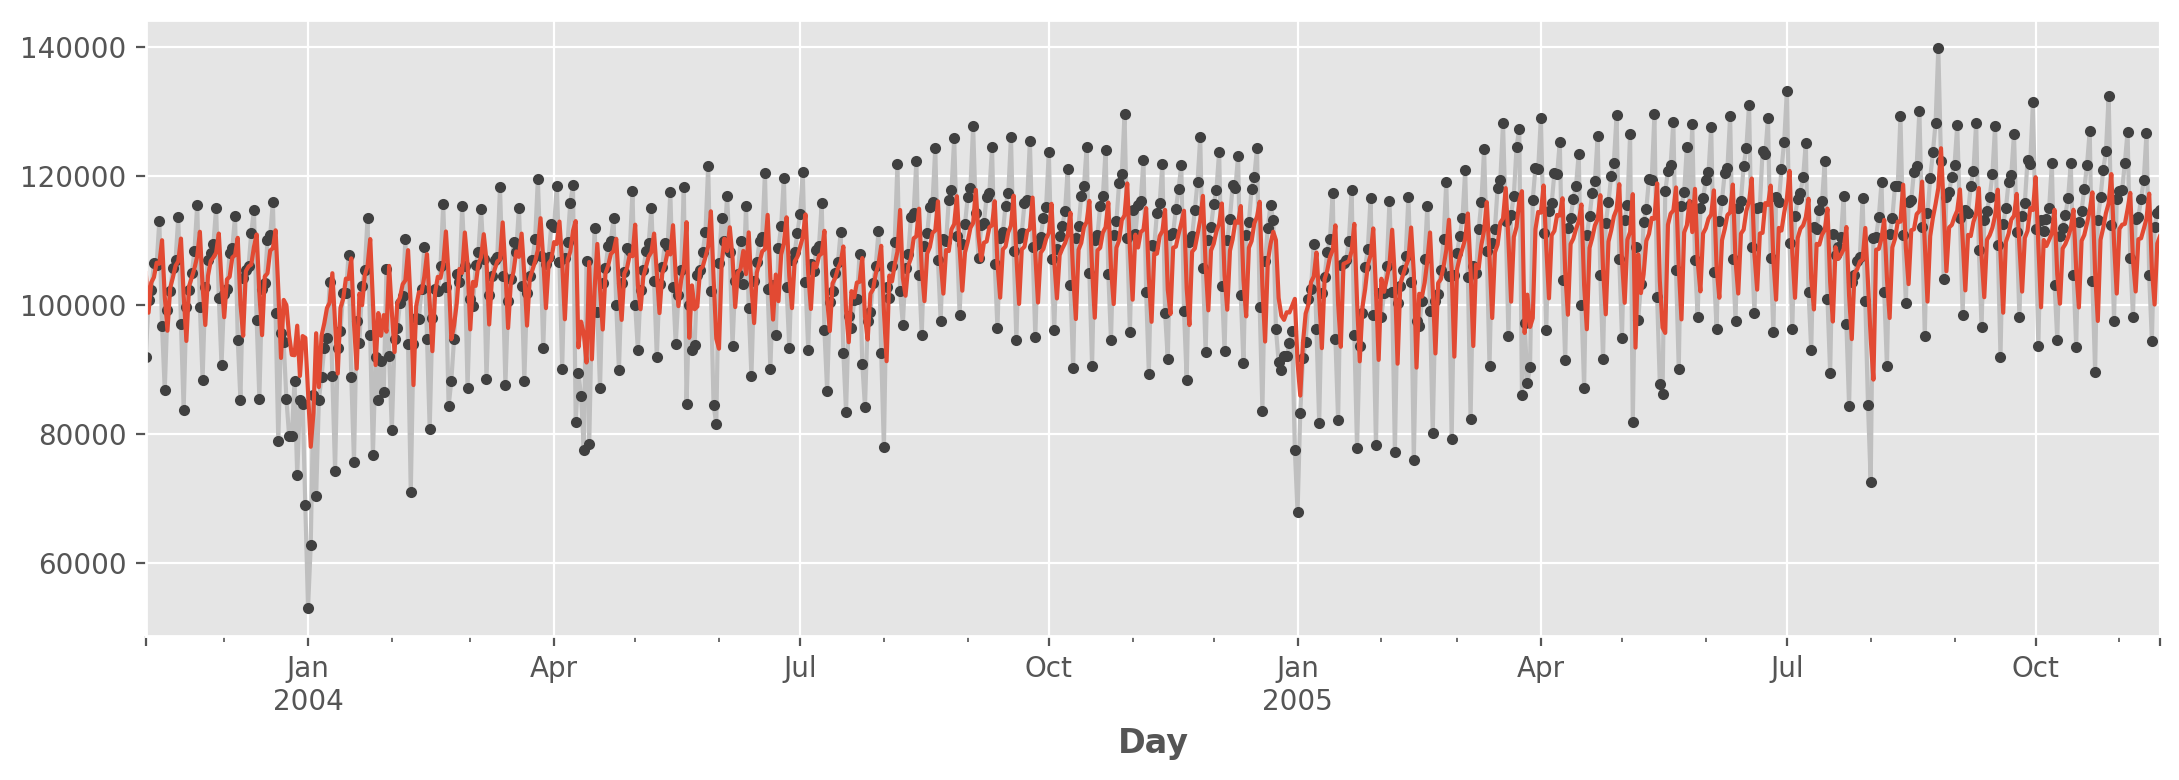

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot()